## <img src = "https://media2.giphy.com/media/QssGEmpkyEOhBCb7e1/giphy.gif?cid=ecf05e47a0n3gi1bfqntqmob8g9aid1oyj2wr3ds3mg700bl&rid=giphy.gif" width = 32px> Clase Base de Datos

La clase ```BD``` se encarga de gestionar las operaciones de la base de datos MySQL en el proyecto. Es un modelo que facilita la conexión con la base de datos, la inserción de datos, y la ejecución de diversas operaciones sobre las tablas de la base de datos. 

En este proyecto, se usa principalmente para almacenar recomendaciones y gestionar a los usuarios utilizando operaciones ```CRUD```.


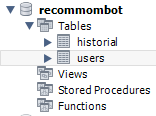


La clase ```BD``` tiene varias responsabilidades clave en este proyecto:

Conexión con la base de datos:

El método ```getConnection()``` establece la conexión a la base de datos recommombot usando las credenciales proporcionadas ```(URL, USER, PASSWORD)```. Si la conexión es exitosa, se imprime un mensaje de éxito en la consola.
Guardar datos en la base de datos:

```guardar(String usuario, String recomendacion)```: Este método inserta en la tabla historial los datos del usuario y la recomendación que se le ofrece. Utiliza un PreparedStatement para prevenir inyecciones ```SQL```.
Consultar datos de la base de datos:

```select():``` Ejecuta una consulta para seleccionar todos los registros de la tabla historial. Luego, imprime los resultados (id, usuario y recomendación) en la consola.
Eliminar registros específicos o todos los registros:

```delete(int id):``` Este método elimina un registro específico de la tabla historial basado en el id proporcionado.
deleteAll(): Elimina todos los registros de la tabla historial.
Gestión de usuarios:

```validateUser(String username, String password):``` Valida si un usuario existe en la base de datos con el nombre de usuario y la contraseña proporcionados.
```registerUser(String username, String password, String email)```: Registra un nuevo usuario en la base de datos con el nombre de usuario, la contraseña y el correo electrónico proporcionados.
Creación de la tabla de usuarios:

```CreateTable():``` Crea la tabla Users en la base de datos si no existe. La tabla tiene columnas para id, username, password y email.

In [ ]:
package com.model;

import java.sql.Connection;
import java.sql.DriverManager;
import java.sql.SQLException;
import java.sql.Statement;
import java.sql.PreparedStatement;
import java.sql.ResultSet;

public class BD {
    private static final String URL = "jdbc:mysql://127.0.0.1:3306/recommombot";
    private static final String USER = "root";
    private static final String PASSWORD = "0909";

    public static Connection getConnection() {
        Connection connection = null;
        try {
            connection = DriverManager.getConnection(URL, USER, PASSWORD);
            System.out.println("Conexión exitosa a la base de datos.");
        } catch (SQLException e) {
            System.out.println("Error al conectar a la base de datos.");
            e.printStackTrace();
        }
        return connection;
    }

    public static void guardar(String usuario, String recomendacion) {
        String query = "INSERT INTO historial (usuario, recomendacion) VALUES (?, ?)";

        try (Connection connection = getConnection();
                PreparedStatement stmt = connection.prepareStatement(query)) {

            stmt.setString(1, usuario);
            stmt.setString(2, recomendacion);

            int rowsAffected = stmt.executeUpdate();
            if (rowsAffected > 0) {
                System.out.println("Registros insertados.");
            }
        } catch (SQLException e) {
            System.out.println("Error al guardar la recomendación.");
            e.printStackTrace();
        }
    }

    public static void select() {
        String query = "SELECT * FROM historial";
        try (Connection connection = getConnection();
                PreparedStatement preparedStatement = connection.prepareStatement(query)) {

            ResultSet resultSet = preparedStatement.executeQuery();

            while (resultSet.next()) {
                int id = resultSet.getInt("id");
                String usuario = resultSet.getString("usuario");
                String recomendacion = resultSet.getString("recomendacion");
                System.out
                        .println("ID: " + id + ", Ingreso: " + usuario + ", Historial recomendación: " + recomendacion);
            }
        } catch (SQLException e) {
            e.printStackTrace();
        }
    }

    public static void delete(int id) {
        String query = "DELETE FROM historial WHERE id = ?";
        try (Connection connection = getConnection();
                PreparedStatement preparedStatement = connection.prepareStatement(query)) {

            preparedStatement.setInt(1, id);
            int rowsDeleted = preparedStatement.executeUpdate();
            System.out.println("Historial eliminado correctamente: " + rowsDeleted);
        } catch (SQLException e) {
            e.printStackTrace();
        }
    }

    public static void deleteAll() {
        String query = "DELETE FROM historial";
        try (Connection connection = getConnection();
                PreparedStatement preparedStatement = connection.prepareStatement(query)) {

            int rowsDeleted = preparedStatement.executeUpdate();
            System.out.println("Todos los registros fueron eliminados correctamente. Filas borradas: " + rowsDeleted);
        } catch (SQLException e) {
            e.printStackTrace();
        }
    }

    public boolean validateUser(String username, String password) {
        try {
            String query = "SELECT * FROM Users WHERE username = ? AND password = ?";
            Connection connection = getConnection();
            PreparedStatement statement = connection.prepareStatement(query);
            statement.setString(1, username);
            statement.setString(2, password);
            ResultSet resultSet = statement.executeQuery();
            return resultSet.next();
        } catch (Exception e) {
            e.printStackTrace();
        }
        return false;
    }

    public boolean registerUser(String username, String password, String email) {
        try {
            String query = "INSERT INTO Users (username, password, email) VALUES (?, ?, ?)";
            Connection connection = getConnection();
            PreparedStatement statement = connection.prepareStatement(query);
            statement.setString(1, username);
            statement.setString(2, password);
            statement.setString(3, email);

            statement.executeUpdate();
            return true;
        } catch (Exception e) {
            e.printStackTrace();
        }
        return false;
    }

    public int CreateTable() {
        try {
            String query = "CREATE TABLE IF NOT EXISTS Users (" +
                    "id INT AUTO_INCREMENT PRIMARY KEY," +
                    "username VARCHAR(50) UNIQUE NOT NULL," +
                    "password VARCHAR(50) NOT NULL," +
                    "email VARCHAR(200) NULL" +
                    ");";
            ;

            Connection connection = getConnection();
            Statement stmt = connection.createStatement();
            int result = stmt.executeUpdate(query);
            return result;
        } catch (Exception e) {
            e.printStackTrace();
        }
        return -1;
    }
}